# Compare ranking performance of JRS - KNN ranking data
- JRS: white-box, black-box, factorization machines, explanable ensemble models
- Potential data: Ranking random
- Step:
    - Load recommendation results by all recsys
    - Compute predictive statistic on Y_pred (Class 0 and Class 1)
    and corresponding Y_prob (How confidence the ranking of recommended jobs are calculated on different JRS).

In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Run this for reproduce
# Gets the current working directory
import os
cwd = os.getcwd()
print("Working directory:", cwd)
# Go up one directory from working directory
os.chdir("..")

Working directory: /Users/anhtth/Library/CloudStorage/OneDrive-UniversityofTwente/2023 UT- THESIS/1-Code/0.cb12_main/nb_analysis


# 1. White-box

## Logreg

In [4]:
model = 'logreg'
logreg_recommendations = pd.read_csv('./output_topN_tabular/result_knn_ranking_v2/rec_result_logreg_ranking_v2.csv')

In [5]:
logreg_recommendations.head()

,UserID,JobID,Y_prob,Y_pred,rank
0,13,248446,0.970798,1,0
1,13,367918,0.937227,1,1
2,13,580991,0.445008,0,2
3,13,172155,0.351762,0,3
4,13,799192,0.340405,0,4


In [6]:
logreg_recommendations[['Y_prob', 'Y_pred']].describe()

,Y_prob,Y_pred
count,74320.000000,74320.000000
mean,0.409929,0.258154
std,0.307501,0.437622
min,0.061959,0.000000
25%,0.200742,0.000000
50%,0.252274,0.000000
75%,0.787511,1.000000
max,0.999076,1.000000


In [7]:
logreg_agg = logreg_recommendations.groupby('Y_pred')[['Y_prob']]\
                        .describe() \
                        .reset_index()

In [8]:
logreg_agg

Y_pred   Y_prob                                                              \
            count      mean       std       min       25%       50%       75%   
0      0  55134.0  0.232508  0.064055  0.061959  0.187609  0.224233  0.268022   
1      1  19186.0  0.919776  0.063910  0.500027  0.894667  0.935015  0.960835   

             
        max  
0  0.499968  
1  0.999076

In [9]:
logreg_agg['model']=model

In [10]:
logreg_agg.to_csv('./nb_analysis/logreg_knn_v2_agg_result.csv', header=True, index=False)

## Decision Tree

In [11]:
model = 'dt'
dt_recommendations = pd.read_csv('./output_topN_tabular/result_knn_ranking_v2/rec_result_dt_ranking_v2.csv')

In [12]:
dt_agg = dt_recommendations.groupby('Y_pred')[['Y_prob']]\
                        .describe() \
                        .reset_index()

In [13]:
dt_agg

Y_pred   Y_prob                                             
            count      mean       std  min  25%  50%  75%  max
0      0  14487.0  0.000794  0.019907  0.0  0.0  0.0  0.0  0.5
1      1  59833.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0

In [14]:
dt_agg['model']=model

In [15]:
dt_agg.to_csv('./nb_analysis/dt_knn_v2_agg_result.csv', header=True, index=False)

## Naive Bayes

In [16]:
model = 'nb'
nb_recommendations = pd.read_csv('./output_topN_tabular/result_knn_ranking_v2/rec_result_nb_ranking_v2.csv')

In [17]:
nb_agg = nb_recommendations.groupby('Y_pred')[['Y_prob']]\
                        .describe() \
                        .reset_index()
nb_agg

Y_pred   Y_prob                                                        \
            count      mean       std           min       25%       50%   
0      0   8925.0  0.242182  0.154525  3.692060e-23  0.099704  0.247085   
1      1  65395.0  0.929542  0.115366  5.000054e-01  0.913419  0.989145   

                       
        75%       max  
0  0.377580  0.499991  
1  0.999658  1.000000

In [18]:
nb_agg['model']=model

In [19]:
nb_agg.to_csv('./nb_analysis/nb_knn_v2_agg_result.csv', header=True, index=False)

# 2. Blackbox

### XGBoost

In [20]:
model = 'xgbt'
xgbt_recommendations = pd.read_csv('./output_topN_tabular/result_knn_ranking_v2/rec_result_xgbt_ranking_v2.csv')

In [21]:
xgbt_agg = xgbt_recommendations.groupby('Y_pred')[['Y_prob']]\
                        .describe() \
                        .reset_index()
xgbt_agg

Y_pred   Y_prob                                                              \
            count      mean       std       min       25%       50%       75%   
0      0  55379.0  0.429341  0.002417  0.427327  0.427327  0.427327  0.432242   
1      1  18941.0  0.583396  0.002601  0.582661  0.582661  0.582661  0.582661   

             
        max  
0  0.432242  
1  0.592608

In [22]:
xgbt_agg['model']=model

In [23]:
xgbt_agg.to_csv('./nb_analysis/xgbt_knn_v2_agg_result.csv', header=True, index=False)

### AdaBoost

In [24]:
model = 'ada'
ada_recommendations = pd.read_csv('./output_topN_tabular/result_knn_ranking_v2/rec_result_ada_ranking_v2.csv')

In [25]:
ada_agg = ada_recommendations.groupby('Y_pred')[['Y_prob']]\
                        .describe() \
                        .reset_index()
ada_agg

Y_pred   Y_prob                                                              \
            count      mean       std       min       25%       50%       75%   
0      0  54951.0  0.497150  0.000947  0.493407  0.496498  0.497107  0.497762   
1      1  19369.0  0.506731  0.002511  0.500002  0.505181  0.506703  0.508184   

             
        max  
0  0.499999  
1  0.516579

In [26]:
ada_agg['model']=model

In [27]:
ada_agg.to_csv('./nb_analysis/ada_knn_v2_agg_result.csv', header=True, index=False)

### LDA

In [28]:
model = 'lda'
lda_recommendations = pd.read_csv('./output_topN_tabular/result_knn_ranking_v2/rec_result_lda_ranking_v2.csv')

In [29]:
lda_agg = lda_recommendations.groupby('Y_pred')[['Y_prob']]\
                        .describe() \
                        .reset_index()
lda_agg

Y_pred   Y_prob                                                              \
            count      mean       std       min       25%       50%       75%   
0      0  55372.0  0.017914  0.020852  0.003487  0.012523  0.015606  0.019624   
1      1  18948.0  0.995141  0.009435  0.503845  0.993812  0.996259  0.997728   

             
        max  
0  0.481095  
1  0.999819

In [30]:
lda_agg['model']=model

In [31]:
lda_agg.to_csv('./nb_analysis/lda_knn_v2_agg_result.csv', header=True, index=False)

### QDA

In [32]:
model = 'qda'
qda_recommendations = pd.read_csv('./output_topN_tabular/result_knn_ranking_v2/rec_result_qda_ranking_v2.csv')

In [33]:
qda_agg = qda_recommendations.groupby('Y_pred')[['Y_prob']]\
                        .describe() \
                        .reset_index()
qda_agg

Y_pred   Y_prob                                                        \
            count      mean       std           min       25%       50%   
0      0  11509.0  0.245119  0.154360  5.954841e-22  0.102073  0.249499   
1      1  62811.0  0.919846  0.124938  5.000400e-01  0.890949  0.986915   

                       
        75%       max  
0  0.383077  0.499878  
1  0.999801  1.000000

In [34]:
qda_agg['model']=model

In [35]:
qda_agg.to_csv('./nb_analysis/qda_knn_v2_agg_result.csv', header=True, index=False)

# 3. Factorization Machines model

### fm

In [36]:
model = 'fm'
fm_recommendations = pd.read_csv('./output_topN_myfm/knn_ranking_result_v2/rec20_fm_v2.csv')

In [37]:
fm_agg = fm_recommendations.groupby('Y_pred')[['Y_prob']]\
                        .describe() \
                        .reset_index()
fm_agg

Y_pred   Y_prob                                                              \
            count      mean       std       min       25%       50%       75%   
0      0   5836.0  0.466921  0.034046  0.378862  0.463179  0.480616  0.490008   
1      1  67984.0  0.658330  0.064215  0.500049  0.606945  0.662709  0.704349   

             
        max  
0  0.499995  
1  0.851701

In [38]:
fm_agg['model']=model

In [39]:
fm_agg.to_csv('./nb_analysis/fm_knn_v2_agg_result.csv', header=True, index=False)

### fm_match

In [40]:
model = 'fm_match'
fm_match_recommendations = pd.read_csv('./output_topN_myfm/knn_ranking_result_v2/rec20_fm_match_v2.csv')

In [41]:
fm_match_agg = fm_match_recommendations.groupby('Y_pred')[['Y_prob']]\
                        .describe() \
                        .reset_index()
fm_match_agg

Y_pred   Y_prob                                                              \
            count      mean       std       min       25%       50%       75%   
0      0  54112.0  0.178931  0.083491  0.066639  0.113555  0.173132  0.210981   
1      1  19708.0  0.921078  0.086067  0.500463  0.937207  0.939953  0.942069   

             
        max  
0  0.499964  
1  0.993323

In [42]:
fm_match_agg.to_csv('./nb_analysis/fm_match_knn_v2_agg_result.csv', header=True, index=False)

In [43]:
fm_match_agg['model']=model
# reg_agg = pd.concat([rec_agg, fm_match_agg], axis=0)

### fm_side_info

In [44]:
model = 'fm_side_info'
fm_side_info_recommendations = pd.read_csv('./output_topN_myfm/knn_ranking_result_v2/rec20_fm_side_info_v2.csv')

In [45]:
fm_side_info_agg = fm_side_info_recommendations.groupby('Y_pred')[['Y_prob']]\
                        .describe() \
                        .reset_index()
fm_side_info_agg

Y_pred   Y_prob                                                              \
            count      mean       std       min       25%       50%       75%   
0      0   5837.0  0.397878  0.081304  0.071824  0.346836  0.421373  0.462812   
1      1  67983.0  0.771334  0.104683  0.500059  0.703151  0.790431  0.852802   

             
        max  
0  0.499987  
1  0.984782

In [46]:
fm_side_info_agg['model']=model

In [47]:
fm_side_info_agg.to_csv('./nb_analysis/fm_side_info_knn_v2_agg_result.csv', header=True, index=False)

### fm_extended

In [48]:
model = 'fm_extended'
fm_extended_recommendations = pd.read_csv('./output_topN_myfm/knn_ranking_result_v2/rec20_fm_extended_v2.csv')

In [49]:
fm_extended_agg = fm_extended_recommendations.groupby('Y_pred')[['Y_prob']]\
                        .describe() \
                        .reset_index()
fm_extended_agg

Y_pred   Y_prob                                                              \
            count      mean       std       min       25%       50%       75%   
0      0  54925.0  0.170330  0.080649  0.013330  0.109759  0.153755  0.217305   
1      1  18895.0  0.929785  0.066885  0.500033  0.921773  0.949526  0.962470   

             
        max  
0  0.499903  
1  0.997503

In [50]:
fm_extended_agg.to_csv('./nb_analysis/fm_extended_knn_v2_agg_result.csv', header=True, index=False)

In [51]:
fm_extended_agg['model']=model
# reg_agg = pd.concat([rec_agg, fm_extended_agg], axis=0)

## 4. Ensembled explainabled models (EBM)

### ebm_location

In [52]:
model = 'ebm_location'
ebm_location_recommendations = pd.read_csv('./output_topN_ebm/rec_result_location_knn.csv')

In [53]:
ebm_location_agg = ebm_location_recommendations.groupby('Y_pred')[['Y_prob']]\
                        .describe() \
                        .reset_index()
ebm_location_agg

Y_pred   Y_prob                                                              \
            count      mean       std       min       25%       50%       75%   
0      0  55317.0  0.147946  0.009407  0.147426  0.147426  0.147426  0.147426   
1      1  18503.0  0.899306  0.029809  0.636197  0.893328  0.893328  0.893328   

             
        max  
0  0.317880  
1  0.988192

In [54]:
ebm_location_agg['model']=model

In [55]:
ebm_location_agg.to_csv('./nb_analysis/ebm_location_knn_v2_agg_result.csv', header=True, index=False)

### ebm_side_info

In [56]:
model = 'ebm_side_info'
ebm_side_info_recommendations = pd.read_csv('./output_topN_ebm/rec_result_side_info_knn.csv')

In [57]:
ebm_side_info_agg = ebm_side_info_recommendations. \
                        groupby('Y_pred')[['Y_prob']]\
                        .describe() \
                        .reset_index()
ebm_side_info_agg

Y_pred   Y_prob                                                              \
            count      mean       std       min       25%       50%       75%   
0      0   9354.0  0.435972  0.036003  0.196028  0.423798  0.438088  0.456456   
1      1  64466.0  0.594111  0.033473  0.500304  0.573936  0.598673  0.615840   

             
        max  
0  0.499916  
1  0.796442

In [58]:
ebm_side_info_agg.to_csv('./nb_analysis/ebm_side_info_knn_v2_agg_result.csv', header=True, index=False)

In [59]:
ebm_side_info_agg['model']=model
# reg_agg = pd.concat([rec_agg, ebm_side_info_agg], axis=0)

### ebm_extended

In [60]:
model = 'ebm_extended'
ebm_extended_recommendations = pd.read_csv('./output_topN_ebm/rec_result_extended_knn.csv')

In [61]:
ebm_extended_agg = ebm_extended_recommendations.groupby('Y_pred')[['Y_prob']]\
                        .describe() \
                        .reset_index()
ebm_extended_agg

Y_pred   Y_prob                                                              \
            count      mean       std       min       25%       50%       75%   
0      0  55319.0  0.157914  0.032021  0.071813  0.140782  0.157779  0.174350   
1      1  18501.0  0.919913  0.035425  0.528140  0.904137  0.922781  0.935621   

             
        max  
0  0.489426  
1  0.996042

In [62]:
ebm_extended_agg['model']=model

In [63]:
ebm_extended_agg.to_csv('./nb_analysis/ebm_extended_knn_v2_agg_result.csv', header=True, index=False)

## 5. Model DPEBM

### dpebm_location

In [64]:
model = 'dpebm_location'
dpebm_location_recommendations = pd.read_csv('./output_topN_ebm/rec_result_dpebm_location_knn.csv')

In [65]:
dpebm_location_agg = dpebm_location_recommendations.groupby('Y_pred')[['Y_prob']]\
                        .describe() \
                        .reset_index()
dpebm_location_agg

Y_pred   Y_prob                                                        \
            count      mean           std       min       25%       50%   
0      0  55317.0  0.292478  1.587633e-13  0.292478  0.292478  0.292478   
1      1  18503.0  0.706879  4.240700e-02  0.507987  0.696189  0.696189   

                       
        75%       max  
0  0.292478  0.292478  
1  0.696189  0.851264

In [66]:
dpebm_location_agg['model']=model

In [67]:
dpebm_location_agg.to_csv('./nb_analysis/dpebm_location_knn_v2_agg_result.csv', header=True, index=False)

### dpebm_side_info

In [68]:
model = 'dpebm_side_info'
dpebm_side_info_recommendations = pd.read_csv('./output_topN_ebm/rec_result_dpebm_side_info_knn.csv')

In [69]:
dpebm_side_info_agg = dpebm_side_info_recommendations.groupby('Y_pred')[['Y_prob']]\
                        .describe() \
                        .reset_index()
dpebm_side_info_agg

Y_pred   Y_prob                                                              \
            count      mean       std       min       25%       50%       75%   
0      0  73820.0  0.495693  0.000094  0.495611  0.495624  0.495682  0.495682   

             
        max  
0  0.495901

In [70]:
dpebm_side_info_agg['model']=model
# reg_agg = pd.concat([rec_agg, dpebm_side_info_agg], axis=0)

In [71]:
dpebm_side_info_agg.to_csv('./nb_analysis/dpebm_side_info_knn_v2_agg_result.csv', header=True, index=False)

### dpebm_extended

In [72]:
model = 'dpebm_extended'
dpebm_extended_recommendations = pd.read_csv('./output_topN_ebm/rec_result_dpebm_extended_knn.csv')

In [73]:
dpebm_extended_agg = dpebm_extended_recommendations.groupby('Y_pred')[['Y_prob']]\
                        .describe() \
                        .reset_index()
dpebm_extended_agg

Y_pred   Y_prob                                                              \
            count      mean       std       min       25%       50%       75%   
0      0  55317.0  0.288922  0.000577  0.288365  0.288461  0.288996  0.289204   
1      1  18503.0  0.701373  0.042840  0.502092  0.690063  0.690619  0.691279   

             
        max  
0  0.290190  
1  0.848197

In [74]:
dpebm_extended_agg.to_csv('./nb_analysis/dpebm_extended_knn_v2_agg_result.csv', header=True, index=False)

In [75]:
dpebm_extended_agg['model']=model

In [86]:
reg_agg = pd.concat([logreg_agg, dt_agg, nb_agg,
                    xgbt_agg, ada_agg, lda_agg, qda_agg,
                    fm_agg, fm_match_agg, fm_side_info_agg, fm_extended_agg,
                    ebm_location_agg, ebm_side_info_agg, ebm_extended_agg,
                    dpebm_location_agg, dpebm_side_info_agg, dpebm_extended_agg], axis=0)

In [87]:
reg_agg

Y_pred   Y_prob                                                            \
            count      mean           std           min       25%       50%   
0      0  55134.0  0.232508  6.405484e-02  6.195914e-02  0.187609  0.224233   
1      1  19186.0  0.919776  6.390977e-02  5.000268e-01  0.894667  0.935015   
0      0  14487.0  0.000794  1.990741e-02  0.000000e+00  0.000000  0.000000   
1      1  59833.0  1.000000  0.000000e+00  1.000000e+00  1.000000  1.000000   
0      0   8925.0  0.242182  1.545251e-01  3.692060e-23  0.099704  0.247085   
1      1  65395.0  0.929542  1.153665e-01  5.000054e-01  0.913419  0.989145   
0      0  55379.0  0.429341  2.416892e-03  4.273273e-01  0.427327  0.427327   
1      1  18941.0  0.583396  2.600593e-03  5.826614e-01  0.582661  0.582661   
0      0  54951.0  0.497150  9.471209e-04  4.934067e-01  0.496498  0.497107   
1      1  19369.0  0.506731  2.510818e-03  5.000018e-01  0.505181  0.506703   
0      0  55372.0  0.017914  2.085156e-02  3.486606e-03  0.012523  0.015606   
1      1  18948.0  0.995141  9.435011e-03  5.038452e-01  0.993812  0.996259   
0      0  11509.0  0.245119  1.543599e-01  5.954841e-22  0.102073  0.249499   
1      1  62811.0  0.919846  1.249385e-01  5.000400e-01  0.890949  0.986915   
0      0   5836.0  0.466921  3.404643e-02  3.788619e-01  0.463179  0.480616   
1      1  67984.0  0.658330  6.421485e-02  5.000487e-01  0.606945  0.662709   
0      0  54112.0  0.178931  8.349148e-02  6.663899e-02  0.113555  0.173132   
1      1  19708.0  0.921078  8.606708e-02  5.004629e-01  0.937207  0.939953   
0      0   5837.0  0.397878  8.130400e-02  7.182397e-02  0.346836  0.421373   
1      1  67983.0  0.771334  1.046829e-01  5.000588e-01  0.703151  0.790431   
0      0  54925.0  0.170330  8.064852e-02  1.333014e-02  0.109759  0.153755   
1      1  18895.0  0.929785  6.688455e-02  5.000325e-01  0.921773  0.949526   
0      0  55317.0  0.147946  9.407247e-03  1.474256e-01  0.147426  0.147426   
1      1  18503.0  0.899306  2.980856e-02  6.361966e-01  0.893328  0.893328   
0      0   9354.0  0.435972  3.600258e-02  1.960283e-01  0.423798  0.438088   
1      1  64466.0  0.594111  3.347335e-02  5.003045e-01  0.573936  0.598673   
0      0  55319.0  0.157914  3.202055e-02  7.181259e-02  0.140782  0.157779   
1      1  18501.0  0.919913  3.542459e-02  5.281402e-01  0.904137  0.922781   
0      0  55317.0  0.292478  1.587633e-13  2.924778e-01  0.292478  0.292478   
1      1  18503.0  0.706879  4.240700e-02  5.079871e-01  0.696189  0.696189   
0      0  73820.0  0.495693  9.367782e-05  4.956105e-01  0.495624  0.495682   
0      0  55317.0  0.288922  5.771187e-04  2.883650e-01  0.288461  0.288996   
1      1  18503.0  0.701373  4.283995e-02  5.020917e-01  0.690063  0.690619   

                                 model  
        75%       max                   
0  0.268022  0.499968           logreg  
1  0.960835  0.999076           logreg  
0  0.000000  0.500000               dt  
1  1.000000  1.000000               dt  
0  0.377580  0.499991               nb  
1  0.999658  1.000000               nb  
0  0.432242  0.432242             xgbt  
1  0.582661  0.592608             xgbt  
0  0.497762  0.499999              ada  
1  0.508184  0.516579              ada  
0  0.019624  0.481095              lda  
1  0.997728  0.999819              lda  
0  0.383077  0.499878              qda  
1  0.999801  1.000000              qda  
0  0.490008  0.499995               fm  
1  0.704349  0.851701               fm  
0  0.210981  0.499964         fm_match  
1  0.942069  0.993323         fm_match  
0  0.462812  0.499987     fm_side_info  
1  0.852802  0.984782     fm_side_info  
0  0.217305  0.499903      fm_extended  
1  0.962470  0.997503      fm_extended  
0  0.147426  0.317880     ebm_location  
1  0.893328  0.988192     ebm_location  
0  0.456456  0.499916    ebm_side_info  
1  0.615840  0.796442    ebm_side_info  
0  0.174350  0.489426     ebm_extended  
1  0.935621  0.996042     ebm_extended  
0  0.2

In [88]:
reg_agg_cols = ['Y_pred', 'count', 'mean', 'std', 'min', 'q1', 'med', 'q3', 'max', 'model']

In [89]:
reg_agg.columns = reg_agg_cols

In [90]:
reg_agg.to_csv('./nb_analysis/knn_rec_agg_full.csv', header=True, index=False)

# Plot

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
reg_agg = pd.read_csv('./nb_analysis/knn_rec_agg_full.csv')

In [93]:
reg_agg.columns

Index(['Y_pred', 'count', 'mean', 'std', 'min', 'q1', 'med', 'q3', 'max',
       'model'],
      dtype='object')

In [94]:
reg_agg.head()

,Y_pred,count,mean,std,min,q1,med,q3,max,model
0,0,55134.0,0.232508,0.064055,6.195914e-02,0.187609,0.224233,0.268022,0.499968,logreg
1,1,19186.0,0.919776,0.063910,5.000268e-01,0.894667,0.935015,0.960835,0.999076,logreg
2,0,14487.0,0.000794,0.019907,0.000000e+00,0.000000,0.000000,0.000000,0.500000,dt
3,1,59833.0,1.000000,0.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,dt
4,0,8925.0,0.242182,0.154525,3.692060e-23,0.099704,0.247085,0.377580,0.499991,nb


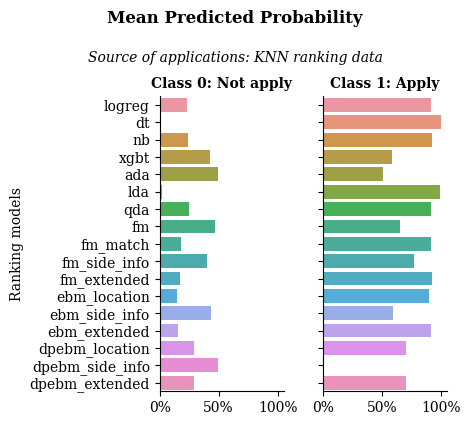

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Set STIX font for plots
plt.rcParams['font.family'] = 'DejaVu Serif'

# Map Y_pred values to corresponding subplot titles
y_pred_mapping = {0: "Class 0: Not apply", 1: "Class 1: Apply"}
reg_agg["Y_pred_title"] = reg_agg["Y_pred"].map(y_pred_mapping)

g = sns.catplot(
    data=reg_agg,
    x="mean",
    y="model",
    col="Y_pred_title",  # Use the 'Y_pred_title' column for subplot titles
    kind="bar",
    height=4,
    aspect=0.6,
    orient="h",
    sharey=True
)

# Set axis labels and titles for the entire plot
g.set_axis_labels("Mean Predicted Probability by different JRS", "Ranking models")  # No \% for x-axis
g.fig.suptitle("Mean Predicted Probability", y=1.05, fontweight='bold')  # Bold main title

# Adjust individual subplot titles
g.set_titles("{col_name}", fontweight='bold')  # Bold subplot titles

# Remove the x-label from each subplot
for ax in g.axes.flat:
    ax.set(xlabel="")

# Format x-axis tick labels as percentage
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
    
# Adjust x-axis tick marks to display 0%, 50%, and 100%
for ax in g.axes.flat:
    ax.set_xticks([0, 0.5, 1])

# Add subtitle with smaller font size and in italic font
subtitle_text = "Source of applications: KNN ranking data"
g.fig.text(0.5, 0.92, subtitle_text, ha='center', fontsize=10, fontweight='normal', style='italic')

# Adjust the spacing between subplots
g.tight_layout()

# Save the plot with high dpi to a local path
output_path = "./nb_analysis/knn_agg_plot.png"
g.savefig(output_path, dpi=300)  # Adjust the dpi value as desired (e.g., 300 for high resolution)

# Show the plot (optional)
plt.show()


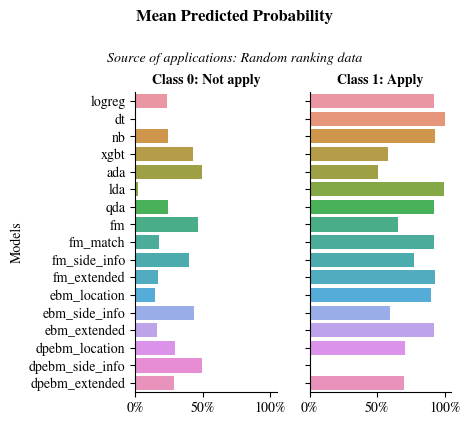

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Set STIX font for plots
plt.rcParams['font.family'] = 'STIXGeneral'

# Map Y_pred values to corresponding subplot titles
y_pred_mapping = {0: "Class 0: Not apply", 1: "Class 1: Apply"}
reg_agg["Y_pred_title"] = reg_agg["Y_pred"].map(y_pred_mapping)

g = sns.catplot(
    data=reg_agg,
    x="mean",
    y="model",
    col="Y_pred_title",  # Use the 'Y_pred_title' column for subplot titles
    kind="bar",
    height=4,
    aspect=0.6,
    orient="h",
    sharey=True
)

# Set axis labels and titles for the entire plot
g.set_axis_labels("Mean Predicted Probability", "Models")  # No \% for x-axis
g.fig.suptitle("Mean Predicted Probability", y=1.05, fontweight='bold')  # Bold main title

# Adjust individual subplot titles
g.set_titles("{col_name}", fontweight='bold')  # Bold subplot titles

# Remove the x-label from each subplot
for ax in g.axes.flat:
    ax.set(xlabel="")

# Format x-axis tick labels as percentage
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
    
# Adjust x-axis tick marks to display 0%, 50%, and 100%
for ax in g.axes.flat:
    ax.set_xticks([0, 0.5, 1])

# Add subtitle with smaller font size and in italic font
subtitle_text = "Source of applications: Random ranking data"
g.fig.text(0.5, 0.92, subtitle_text, ha='center', fontsize=10, fontweight='normal', style='italic')

# Adjust the spacing between subplots
g.tight_layout()

# # Save the plot with high dpi to a local path
# output_path = "path/to/save/figure.png"
# g.savefig(output_path, dpi=300)  # Adjust the dpi value as desired (e.g., 300 for high resolution)

# Show the plot (optional)
plt.show()
